In [ ]:
import requests
url = "http://182.18.164.20/transformer_api/Total_Power/867322031102411"
user = "admin"
passwd = "admin@123"
auth_values = (user, passwd)
response = requests.get(url, auth=auth_values)

In [ ]:
import pandas as pd
tp = pd.DataFrame.from_dict(response.json(), orient='columns')
tp

,A_id,DeviceImei,DeviceTimeStamp,KWH,KVARH,Sum_I,KW,KVA,KVAR,MPD,MKVAD
0,1870006,867322031102411,2021-11-30T03:00:50,856840.800,865883.900,0.0,39.515,40.656,9.560,158.7,159.5
1,1869982,867322031102411,2021-11-30T02:46:22,856831.100,865873.900,0.0,39.364,40.270,8.490,158.7,159.5
2,1869981,867322031102411,2021-11-30T02:45:50,856830.700,865873.500,0.0,39.832,40.763,8.662,158.7,159.5
3,1869956,867322031102411,2021-11-30T02:31:22,856820.800,865863.400,0.0,40.713,42.024,10.415,158.7,159.5
4,1869955,867322031102411,2021-11-30T02:30:50,856820.400,865863.100,0.0,42.825,43.893,9.624,158.7,159.5
...,...,...,...,...,...,...,...,...,...,...,...
60160,4613,867322031102411,2020-11-18T13:05:17,105.289,107.619,0.0,224.084,229.061,47.487,0.0,0.0
60161,4612,867322031102411,2020-11-18T13:04:16,101.439,103.676,0.0,228.340,233.343,48.061,0.0,0.0
60162,4611,867322031102411,2020-11-18T13:03:18,97.639,99.793,0.0,238.074,244.342,54.985,0.0,0.0
60163,4610,867322031102411,2020-11-18T13:02:54,96.089,98.215,0.0,233.736,238.651,48.184,0.0,0.0


In [ ]:
tp.drop(columns=['A_id', 'Sum_I'], inplace=True)
tp.head()

,DeviceImei,DeviceTimeStamp,KWH,KVARH,KW,KVA,KVAR,MPD,MKVAD
0,867322031102411,2021-11-30T03:00:50,856840.8,865883.9,39.515,40.656,9.560,158.7,159.5
1,867322031102411,2021-11-30T02:46:22,856831.1,865873.9,39.364,40.270,8.490,158.7,159.5
2,867322031102411,2021-11-30T02:45:50,856830.7,865873.5,39.832,40.763,8.662,158.7,159.5
3,867322031102411,2021-11-30T02:31:22,856820.8,865863.4,40.713,42.024,10.415,158.7,159.5
4,867322031102411,2021-11-30T02:30:50,856820.4,865863.1,42.825,43.893,9.624,158.7,159.5


In [ ]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.4 MB/s 


In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyoff

In [ ]:
plot_data = [
    go.Scatter(
        x=tp['DeviceTimeStamp'],
        y=tp['KVAR'],
        name='KVAR'
    )
    
]
plot_layout = go.Layout(
        title='Total Power',
        xaxis_title='Time',
        yaxis_title='KVAR',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
#fig.update_layout(xaxis=dict(rangeslider=dict(visible=True), type="linear"))
pyoff.iplot(fig)

In [ ]:
tp['DeviceTimeStamp'] = pd.to_datetime(tp['DeviceTimeStamp'])
tp.head()

,DeviceImei,DeviceTimeStamp,KWH,KVARH,KW,KVA,KVAR,MPD,MKVAD
0,867322031102411,2021-11-30 03:00:50,856840.8,865883.9,39.515,40.656,9.560,158.7,159.5
1,867322031102411,2021-11-30 02:46:22,856831.1,865873.9,39.364,40.270,8.490,158.7,159.5
2,867322031102411,2021-11-30 02:45:50,856830.7,865873.5,39.832,40.763,8.662,158.7,159.5
3,867322031102411,2021-11-30 02:31:22,856820.8,865863.4,40.713,42.024,10.415,158.7,159.5
4,867322031102411,2021-11-30 02:30:50,856820.4,865863.1,42.825,43.893,9.624,158.7,159.5


In [ ]:
import datetime
x=tp['DeviceTimeStamp'].max()
y=tp['DeviceTimeStamp'].min()
days = datetime.timedelta(15)
week=x-days
prev_week=x-(2*days)

In [ ]:
kvar_given=tp[tp['DeviceTimeStamp']>=prev_week]
kvar_given=kvar_given[kvar_given['DeviceTimeStamp']<week]
kvar_given

,DeviceImei,DeviceTimeStamp,KWH,KVARH,KW,KVA,KVAR,MPD,MKVAD
1993,867322031102411,2021-11-15 03:00:17,830254.9,838897.3,46.012,47.040,9.784,158.7,159.5
1994,867322031102411,2021-11-15 02:46:21,830243.7,838886.1,48.284,49.334,10.125,158.7,159.5
1995,867322031102411,2021-11-15 02:45:50,830243.3,838885.5,47.650,48.785,10.463,158.7,159.5
1996,867322031102411,2021-11-15 02:30:49,830231.3,838873.3,46.806,47.975,10.527,158.7,159.5
1997,867322031102411,2021-11-15 02:16:23,830220.0,838861.8,46.066,46.917,8.894,158.7,159.5
...,...,...,...,...,...,...,...,...,...
3822,867322031102411,2021-10-31 03:31:31,797355.3,805554.9,92.926,94.332,16.223,233.1,234.2
3823,867322031102411,2021-10-31 03:16:22,797331.7,805531.0,94.317,95.415,14.430,233.1,234.2
3824,867322031102411,2021-10-31 03:15:50,797330.8,805530.1,94.080,95.218,14.678,233.1,234.2
3825,867322031102411,2021-10-31 03:01:23,797306.8,805505.8,101.863,103.258,16.918,233.1,234.2


In [ ]:
kvar_req=tp[tp['DeviceTimeStamp']>=week]
kvar_req.tail()

,DeviceImei,DeviceTimeStamp,KWH,KVARH,KW,KVA,KVAR,MPD,MKVAD
1988,867322031102411,2021-11-15 03:45:51,830289.4,838932.7,48.085,49.276,10.766,158.7,159.5
1989,867322031102411,2021-11-15 03:30:49,830278.0,838921.0,44.705,45.800,9.952,158.7,159.5
1990,867322031102411,2021-11-15 03:16:22,830267.3,838910.1,48.182,49.282,10.351,158.7,159.5
1991,867322031102411,2021-11-15 03:15:50,830266.9,838909.6,43.947,45.014,9.740,158.7,159.5
1992,867322031102411,2021-11-15 03:00:50,830255.3,838897.8,48.371,49.381,9.934,158.7,159.5


In [ ]:
from statsmodels.tsa.stattools import adfuller
X=tp['KVAR'].values
result=adfuller(X)
print('ADF statistic : f', result[0])
print('P value : ', result[1])
print('critical values :')
print(result)
for key,value in result[4].items():
  print('\t%s: %.3f' %(key,value))
if result[0]<result[4]["5%"]:
  print("It is stationery.")
else:
  print("It is not stationery.")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



ADF statistic : f -13.554596784842873
P value :  2.373331903920658e-25
critical values :
(-13.554596784842873, 2.373331903920658e-25, 60, 60104, {'1%': -3.430458804394126, '5%': -2.861588089485819, '10%': -2.5667955964118137}, 242247.30821062403)
	1%: -3.430
	5%: -2.862
	10%: -2.567
It is stationery.


In [ ]:
print(result)

(-13.554596784842873, 2.373331903920658e-25, 60, 60104, {'1%': -3.430458804394126, '5%': -2.861588089485819, '10%': -2.5667955964118137}, 242247.30821062403)


In [ ]:
plot_data = [
    go.Scatter(
        x=kvar_given['DeviceTimeStamp'],
        y=kvar_given['KVAR'],
        name='KVAR'
    )
    
]
plot_layout = go.Layout(
        title='Total Power',
        xaxis_title='Time',
        yaxis_title='KVAR'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
#fig.update_layout(xaxis=dict(rangeslider=dict(visible=True), type="linear"))
pyoff.iplot(fig)

In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
dataset_kvar = tp[['DeviceTimeStamp','KVAR']]


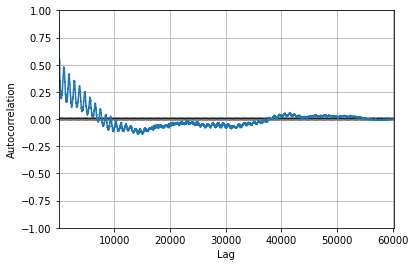

In [ ]:
autocorrelation_plot(tp['KVAR'])

In [ ]:
from fbprophet import Prophet

In [ ]:
dataset_kvar

,DeviceTimeStamp,KVAR
0,2021-11-30 03:00:50,9.560
1,2021-11-30 02:46:22,8.490
2,2021-11-30 02:45:50,8.662
3,2021-11-30 02:31:22,10.415
4,2021-11-30 02:30:50,9.624
...,...,...
60160,2020-11-18 13:05:17,47.487
60161,2020-11-18 13:04:16,48.061
60162,2020-11-18 13:03:18,54.985
60163,2020-11-18 13:02:54,48.184


In [ ]:
dataset_kvar = dataset_kvar.rename(columns={'DeviceTimeStamp':'ds', 'KVAR':'y'})

In [ ]:
model=Prophet(daily_seasonality=True)
model_fit=model.fit(dataset_kvar)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = kvar_req[['DeviceTimeStamp']]
future = future.rename(columns={'DeviceTimeStamp':'ds'})
future.tail()

,ds
1988,2021-11-15 03:45:51
1989,2021-11-15 03:30:49
1990,2021-11-15 03:16:22
1991,2021-11-15 03:15:50
1992,2021-11-15 03:00:50


In [ ]:
nexttime=x+datetime.timedelta(minutes = 15)
nexttime

Timestamp('2021-11-30 03:15:50')

In [ ]:
future_time_stamps=[]
ts=x
for i in range(0, 1999):
    ts = ts + datetime.timedelta(minutes = 15)
    future_time_stamps.append(ts)
xa=pd.DataFrame(future_time_stamps)

In [ ]:
xa.columns=['ds']
xa


,ds
0,2021-11-30 03:15:50
1,2021-11-30 03:30:50
2,2021-11-30 03:45:50
3,2021-11-30 04:00:50
4,2021-11-30 04:15:50
...,...
1994,2021-12-20 21:45:50
1995,2021-12-20 22:00:50
1996,2021-12-20 22:15:50
1997,2021-12-20 22:30:50


In [ ]:
forecast = model.predict(xa)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1994,2021-12-20 21:45:50,13.558558,6.488486,16.820158,10.567496,17.179734,-2.284215,-2.284215,-2.284215,-2.035643,-2.035643,-2.035643,-0.248572,-0.248572,-0.248572,0.0,0.0,0.0,11.274343
1995,2021-12-20 22:00:50,13.558168,6.732813,16.557639,10.564895,17.186677,-2.194460,-2.194460,-2.194460,-1.948330,-1.948330,-1.948330,-0.246130,-0.246130,-0.246130,0.0,0.0,0.0,11.363709
1996,2021-12-20 22:15:50,13.557778,6.686712,16.919140,10.562295,17.192743,-2.097909,-2.097909,-2.097909,-1.854248,-1.854248,-1.854248,-0.243661,-0.243661,-0.243661,0.0,0.0,0.0,11.459869
1997,2021-12-20 22:30:50,13.557388,6.606626,16.977994,10.559694,17.194761,-1.999560,-1.999560,-1.999560,-1.758394,-1.758394,-1.758394,-0.241167,-0.241167,-0.241167,0.0,0.0,0.0,11.557827
1998,2021-12-20 22:45:50,13.556998,6.785159,16.980654,10.557094,17.196718,-1.904226,-1.904226,-1.904226,-1.665579,-1.665579,-1.665579,-0.238647,-0.238647,-0.238647,0.0,0.0,0.0,11.652772


In [ ]:
plot_data = [
    go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat'],
        name='KVAR'
    )
    
]
plot_layout = go.Layout(
        title='Total Power',
        xaxis_title='Time',
        yaxis_title='KVAR'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
#fig.update_layout(xaxis=dict(rangeslider=dict(visible=True), type="linear"))
pyoff.iplot(fig)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
error = mean_squared_error(kvar_req['KVAR'],forecast['yhat'])
print('Test MSE: %.3f' % error)
rmse_il1 = np.sqrt(mean_squared_error(kvar_req['KVAR'],forecast['yhat']))
print('Test RMSE: %.3f' % rmse_il1)

ValueError: ignored

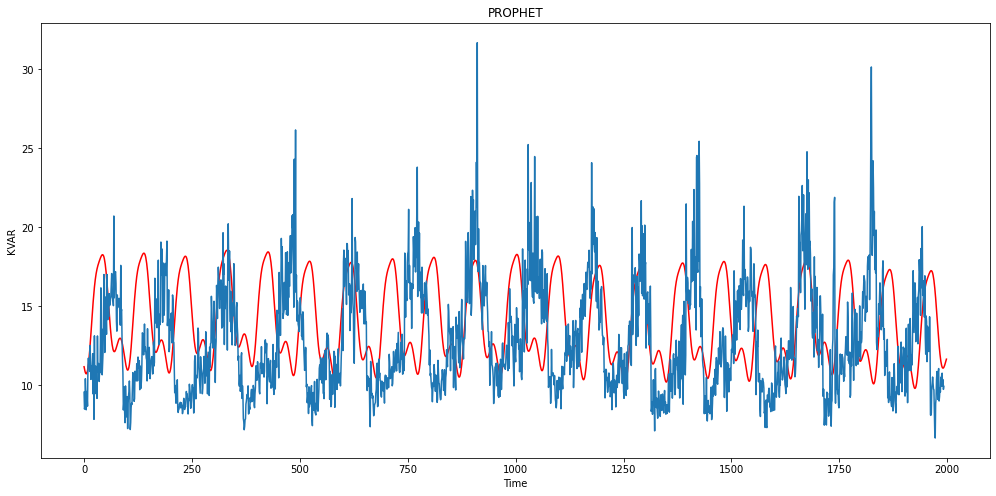

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(17,8))
plt.title("PROPHET")
plt.xlabel("Time")
plt.ylabel("KVAR")
plt.plot(forecast['yhat'], color='Red', label='Predicted')
plt.plot(kvar_req['KVAR'], label='Original')

In [ ]:
plot_data = [
    go.Scatter(
        x=tp['DeviceTimeStamp'],
        y=kvar_given['KVAR'],
        name='KVAR'
    ),
    go.Scatter(
        x=xa['ds'],
        y=forecast['yhat'],
        name='Predicted'
    )
]
plot_layout = go.Layout(
        title='Forecasting of Reactive Power using Prophet',
        yaxis_title='KVAR',
        xaxis_title='Time',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)